# Watson and Williams Test and other Circular Statistics in R 

### Directions: 
First we have to install the circular package in the environment. This will give a warning in a red box but that is ok. 

To run Code press the Run button at the top to press through.

![title](run.png "ShowMyImage")

Code is split into cells so that parts of it can be run sequentially and output can be given for each of those sections as it is run.

In [1]:
#install circular
install.packages("circular") #may get some warngings - this is ok
install.packages("reshape2")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



### Step 2: Import Libraries
Next we need to import relevant libraries. These libraries are from installed packages, including the circular package installed above, and a plotting package ggplot2 that was able to be installed prior to opening the notebook.

In [2]:
#import necessary libraries
library(circular)
library(ggplot2)
library(reshape2)


Attaching package: ‘circular’


The following objects are masked from ‘package:stats’:

    sd, var




### Step 3: Import Our Data
Here, data is imported from a csv. This CSV must be present in the "Home" page in files. To upload a new CSV, go back to this original "Home" page and select "upload"

If you upload a different file, remember **you will need to change the file name in the quotation marks below to match the file name you uploaded**

In [3]:
#import data from csv (csv needs to be uploaded on "home" page)
dataset = read.csv("alignment_analysis3.csv")


### Step 4: Assess and format uploaded data
The next series of cells analyze the data uploaded from the csv and format it so it can be analyzed through the circular statistics codes. First, I check the dimensions of the data and pull the headers of the columns from the program. The headers are used in the next box of code so **if your headers are different you will need to change the next portion of code and all references to those variables.**

In [4]:
#Check dimensions of imported data and column names
dim(dataset)
names(dataset)

[1] 180   5

[1] "Angle"  "X9_nw"  "X0_mw"  "X20_mw" "test"

In [5]:
## Rename Columnes because they came out weird and don't want to figure out that formatting right now
names(dataset)[names(dataset) == "Angle"] <- "Angle"
names(dataset)[names(dataset) == "X9_nw"] <- "nine"
names(dataset)[names(dataset) == "X0_mw"] <- "zero"
names(dataset)[names(dataset) == "X20_mw"] <- "twenty"
names(dataset)[names(dataset) == "test"] <- "test"

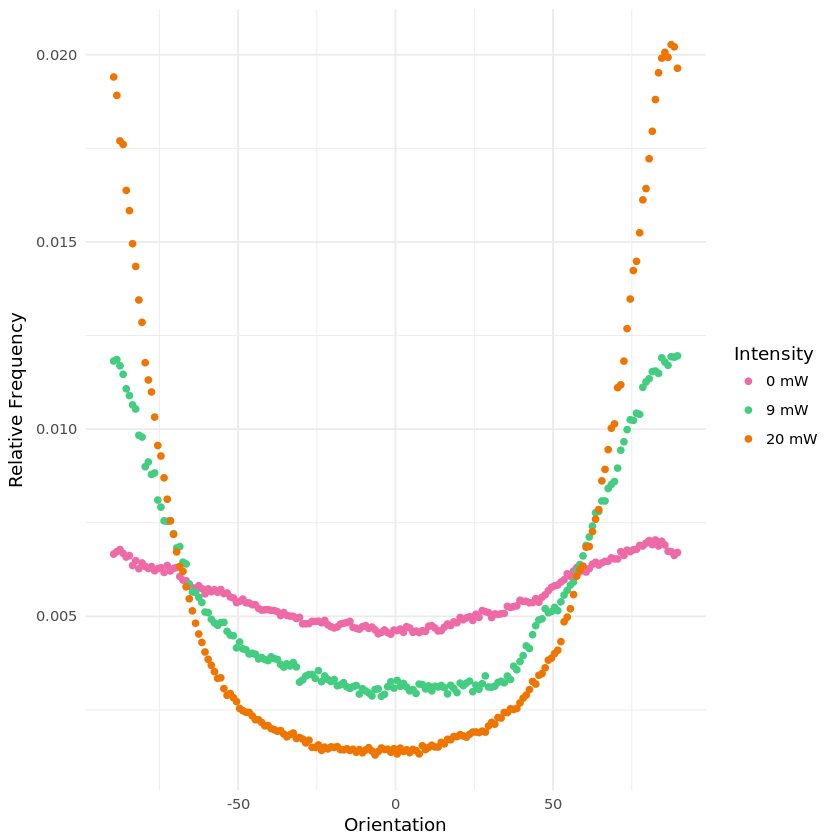

In [6]:
#visualize imported data with plot to make sure it looks ok
#visualize imported data with plot to make sure it looks ok
dat <- data.frame(x=c(dataset$Angle),zero_mW=c(dataset$zero),nine_mW=c(dataset$nine),twenty_mW=c(dataset$twenty))
dat.m <- melt(dat, id.vars="x")

ggplot(dat.m,aes(x,value,colour=variable))+
    geom_point()+
    scale_color_manual(values=c("hotpink2","seagreen3","darkorange2"),
                      name="Intensity",
                      labels=c("0 mW","9 mW","20 mW"))+
    theme_minimal()+
    labs(x="Orientation",y="Relative Frequency")
    

#a+geom_jitter(color="blue")+theme_minimal()
#b+geom_jitter(color="red")
#ggplot(data= datamp, aes(x = Angle, y = C,B)) +
#geom_point()

### Step 5: Adjust data so it is circular 

This first cell takes the data from the spreadsheet and turns it into matrix format and also groups each column with the angle columns. The variables are all totally arbitrary. byrow=false because I want the matrix organized by columns.

I then test if the program detects the data as "circular." The FALSE outputs show it is not. Even though the data IS circular, we have to label it as that so the program knows to treat it as such. 

The second cell #make data circular uses the circular function to do just that. Again, does nothing to change the data, but just lets the program know we want this data treated in a circular manner. The "TRUE" outputs show that the program now correctly reads the data as circular. 

units are in degrees because I want visualization/data nalysis in degrees. Templates, such as "geographies" are available so that when plotting it will reference data in regards to directions like north, south east west. I didn't use any of these templates for this.

In [7]:
#Put data into format for making circular and statistical tests
DT <- matrix(c(dataset$Angle,dataset$nine),ncol=2,byrow=FALSE)
AB <- matrix(c(dataset$Angle,dataset$zero),ncol=2,byrow=FALSE)
CD <- matrix(c(dataset$Angle,dataset$twenty),ncol=2,byrow=FALSE)
EF <- matrix(c(dataset$Angle,dataset$test),ncol=2,byrow=FALSE)

## test if program detects data as circular?
is.circular(DT)
is.circular(AB)
is.circular(CD)
is.circular(EF)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [8]:
#make data circular
Nine_mw <- circular(DT, units="degrees", template="none")
Zero_mw <- circular(AB, units="degrees", template="none")
Twenty_mw  <- circular(CD, units="degrees", template="none") 
TEST <-circular(EF, units="degrees", template="none") 

## Test is program detects data as circular?

is.circular(Nine_mw)
is.circular(Zero_mw)
is.circular(Twenty_mw)
is.circular(TEST)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

### Step 6: Run some statistical tests

The data is finally in a format to run through some of the circular statistics functions. 

First I ran some uniformity tests. These tests can be run on a single set of data. there are a couple of options for testing uniformity, including the Rayleigh, Kuiper, and Rao tests. These tests suggest a uniform distribution. 

** NOTE. P value of 0 is not actually 0, but is so small the program rounds it to zero. 

[Rayleigh Test](https://www.rdocumentation.org/packages/circular/versions/0.4-93/topics/rayleigh.test)

why rayleigh test is fine for unimodal distributions (and- when to use others): [stats comparisons ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6060829/)

Great explanation of Rayleigh test and output in this paper: [Rayleigh explanation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5310581/) Basically output suggests that if there is a peak - there is only one significant peak, or unimodal distribution. There are also Kuiper's test and Rao's spacing test. I have looked less into these, but they test for similar measures. You can find more about these tests in _[Package Circular](https://cran.r-project.org/web/packages/circular/circular.pdf)_  


In [9]:
# rayleigh test
rayleigh.test(Twenty_mw)
rayleigh.test(Nine_mw)
rayleigh.test(Zero_mw)
rayleigh.test(TEST)

#kuiper test
kuiper.test(Twenty_mw)

#rao spacing test
rao.spacing.test(Twenty_mw)

#watson uniformity test
watson.test(Twenty_mw)


       Rayleigh Test of Uniformity 
       General Unimodal Alternative 

Test Statistic:  0.8183 
P-value:  0 



       Rayleigh Test of Uniformity 
       General Unimodal Alternative 

Test Statistic:  0.8183 
P-value:  0 



       Rayleigh Test of Uniformity 
       General Unimodal Alternative 

Test Statistic:  0.8183 
P-value:  0 



       Rayleigh Test of Uniformity 
       General Unimodal Alternative 

Test Statistic:  0.8183 
P-value:  0 



       Kuiper's Test of Uniformity 
 
Test Statistic:  9.6238 
P-value < 0.01 
 


       Rao's Spacing Test of Uniformity 
 
Test Statistic = 180 
P-value < 0.001 
 


       Watson's Test for Circular Uniformity 
 
Test Statistic: 15.0325 
P-value < 0.01 
 

### Step 6.2 Watson Two Test

Ok, next I wanted to compare some of my data. I first tried the watson two test because it was the simplest and only analyzes two groups at once. see this link to read about available functions _[Package Circular](https://cran.r-project.org/web/packages/circular/circular.pdf)_ Page 125 describes this functon

If P<0.05, then you can reject hypothesis that the distributions are the same. The difference, if P<0.05, could be in mean, angular variance, etc. 

The Test statistic is similar to an F-critical value (If the calculated F-value is greater than F-statistic or F-critical value, the null hypothesis is rejected; otherwise, the null hypothesis is not rejected.). I have not found the proper table to look the critical test statistic to compare, but as the program calculates the P-value, I don't believe this is too important.


In [10]:
#watson two test 
#Are two groups' orientations significantly different from each other? 
watson.two.test(Twenty_mw,Zero_mw)
watson.two.test(Nine_mw,Zero_mw)
watson.two.test(Twenty_mw,Nine_mw)

#test data to make sure this is working the way I think it is 
# if p value is < 0.05 should be statistically different/significant, >0.05 not statistically significant/different
watson.two.test(Zero_mw,TEST) #test is a fake set that should definitely be statistically significant 
watson.two.test(Zero_mw,Zero_mw) #testing should not be statistically significant because they are the same 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.874 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.3378 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.0375 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4.657 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4e-04 
P-value > 0.10 
 

### Step 6.3 Watson Williams Test

Next I ran the Watson Williams Test. While the Two test results suggested that each of the groups are statistically significant, except for the last, which should not be statistically significant since a group is being compared against itself, the output below suggest the groups are not statistically significant.

The test below however appears to be comparing the "means" of the groups, or at what angle the most points are located. Even though the magnitudes are different, since most of the points are centered at the same angle, that is why this test says there is not a difference.

But again, unclear. I may also be running this test incorrectly, or interpreting the results incorrectly. I've been looking up F critical values from this link: _[F_crit lookup](https://www.danielsoper.com/statcalc/calculator.aspx?id=4)_
- based on what I've read, you are supposed to reject null hypothesis if the critical F value from the table lookup is less than the F value 
- The values for this critical F that I've been using are based on the p value ( I assume .99 when it outputs one) and the df1 and df2 values output by the test results. 
- The F value = 0 and p-value = 1 outputs seem a little fishy to me. I need to think through what might be causing them and run through some testing with sample datasets that I know the output of. I will have time to do this tomorrow (Sunday) and will keep you updated. 
- The means seem to be the means of all the values. 

In [11]:
options(digits=10) # tried to keep the program from "rounding" the F or p-values but this seems to have an impact only on the mean outputs 

# These groups should be statistically significant 
data1 <- list(Zero_mw, TEST)
watson.williams.test(data1)

#actual data that I am comparing 
data2 <- list(Zero_mw, Nine_mw,Twenty_mw)
watson.williams.test(data2)

#comparing datasets to itself for control test 
data3 <- list(Zero_mw, Zero_mw,Zero_mw)
watson.williams.test(data3)


	Watson-Williams test for homogeneity of means

data:  1 and 2
F = 0, df1 = 1, df2 = 718, p-value = 1
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = none 
Modulo = asis 
Zero = 0 
Rotation = counter 
     mean of 1      mean of 2 
0.003394513635 0.003394396607 



	Watson-Williams test for homogeneity of means

data:  1 and 2 and 3
F = 0, df1 = 2, df2 = 1077, p-value = 1
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = none 
Modulo = asis 
Zero = 0 
Rotation = counter 
     mean of 1      mean of 2      mean of 3 
0.003394513635 0.003394513640 0.003394513615 



	Watson-Williams test for homogeneity of means

data:  1 and 2 and 3
F = 3.4968786e-13, df1 = 2, df2 = 1077, p-value = 1
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = none 
Modulo = asis 
Zero = 0 
Rotation = counter 
     mean of 1      mean of 2      mean of 3 
0.003394513635 0.003394513635 0.003394513635 


### Step 6.4 Watson Williams Test
Next I ran the Watson Wheeler Test. This test is the same as above, but in addition to checking for differences in the means of the group, it also checks for differences in the variance. Here, you see expected outcomes.

You may get a "warning" message from this about ties. From running the test multiple times as suggested, I seem to get similar outputs- at least as far as whether P << 0.05 or > 0.05. The P-values do seem to change slightly though. you can read more about ties here, although implementing the ties method did not seem to remove the error message. [ties method error](https://stats.stackexchange.com/questions/34008/how-does-ties-method-argument-of-rs-rank-function-work)

this article discusses ties and suggests that this test can still be used even with ties through randomization + multiple runs of test [ties discussion](https://pdfs.semanticscholar.org/ca57/d5b8af7a44b502fe1000c23bb1340920c312.pdf)

more on ties from stack exchange forum here as well (different test, but similar concept): [ties forum](https://stats.stackexchange.com/questions/206739/non-parametric-test-that-handles-ties-in-data)

In [12]:
watson.wheeler.test(data1) # These groups should be statistically significant 
watson.wheeler.test(data2) #actual data that I am comparing 
watson.wheeler.test(data3) #comparing datasets to itself for control test 

Warning message in watson.wheeler.test.default(x, group):
“There are 192 ties in the data.
  Ties will be broken appart randomly and may influence the result.
  Re-run the test several times to check the influence of ties.”



	Watson-Wheeler test for homogeneity of angles

data:  1 and 2
W = 143.25197, df = 2, p-value < 2.2204e-16


Warning message in watson.wheeler.test.default(x, group):
“There are 382 ties in the data.
  Ties will be broken appart randomly and may influence the result.
  Re-run the test several times to check the influence of ties.”



	Watson-Wheeler test for homogeneity of angles

data:  1 and 2 and 3
W = 51.756187, df = 4, p-value = 1.551262e-10


Warning message in watson.wheeler.test.default(x, group):
“There are 726 ties in the data.
  Ties will be broken appart randomly and may influence the result.
  Re-run the test several times to check the influence of ties.”



	Watson-Wheeler test for homogeneity of angles

data:  1 and 2 and 3
W = 0.00022730797, df = 4, p-value = 1


### Step 6.5 Circular Standard Deviation
[sonia mauck lab paper](https://onlinelibrary.wiley.com/doi/pdf/10.1002/jor.24697?casa_token=VNMcElXNkK8AAAAA:JYsnUzaxhAoqVeR8uvPinMbL1Yfaffpn9ZbPwXpoT3tcsUDcqtgcA5q-NIe11Nm26g1R24EqGNJ1n6k)

Sonia uses circular statistics matlab package: [read more here](https://www.mathworks.com/matlabcentral/fileexchange/10676-circular-statistics-toolbox-directional-statistics) and analyzes the circular standard deviation. You can do this in R as below.

While Sonia seems to have normalized her data, previous mauck lab papers [like this one](https://www.nature.com/articles/s41598-018-29060-y#Fig3) report circular standard deviation as numbers greater than 1. 

In [13]:
sd(Twenty_mw)
sd(Nine_mw)
sd(Zero_mw)
sd(TEST)

[1] 3.023191492549 0.005512064705

[1] 3.023191492549 0.002892023628

[1] 3.0231914925492 0.0007605097028

[1] 3.02319149255 0.06349771787

### Extra: Plotting example
I was looking at this online post to help work through some of what these functions mean. I thought the plot visualization, while not really "pretty" as far as plots go, might be useful and has been useful to help me understand the data and the format it is in. A sample plot is below

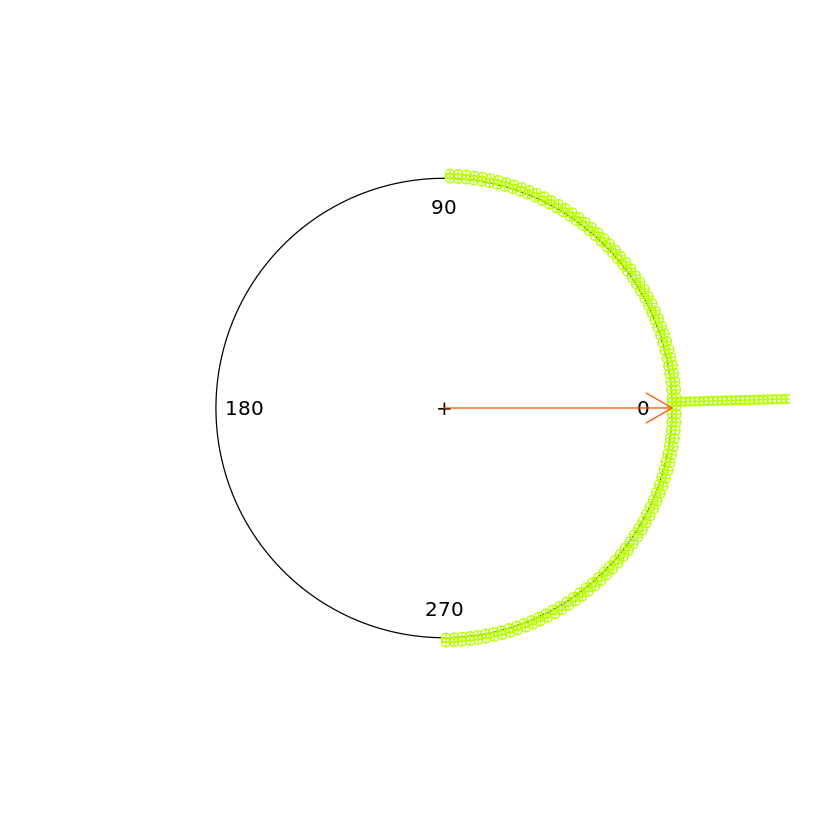

In [15]:
#sample plot from circular tool functions
test = circular.colors(9, m = 1, M = 2 * pi,offset=25)
plot.circular(Twenty_mw, stack= TRUE, pch = 10, sep = 0.02, shrink = 1.2,col=test[1])
Twenty_mw.mean <- mean(Twenty_mw)
arrows.circular(Twenty_mw.mean, col=test[8])

### More Watson Williams Test Troublshooting
To make sure I am running the actual code correctly, I tested the example data offered on the watson.williams.test R page. this seems to come out ok and finally gives F and p-values different from 0 and 1 like the data above. 

In [17]:

data <- list(
  exp = circular(rep(c(-20, -10, 0), c(1,7,2)), 
        units="degrees", template="geographics"),
  control = circular(rep(c(-10, 0, 10, 20), c(3,3,3,1)), 
            units="degrees", template="geographics")
)

watson.williams.test(data)


	Watson-Williams test for homogeneity of means

data:  exp and control
F = 8.7328625, df1 = 1, df2 = 18, p-value = 0.008471694
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = geographics 
Modulo = asis 
Zero = 1.570796327 
Rotation = clock 
mean of control     mean of exp 
    1.988968942    -9.000615262 
